### Non-parametric statistics lecture

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

% config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import rcParams
% matplotlib inline
rcParams['figure.figsize'] = 8, 6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']


### Kolmogorov-Smirnoff Test

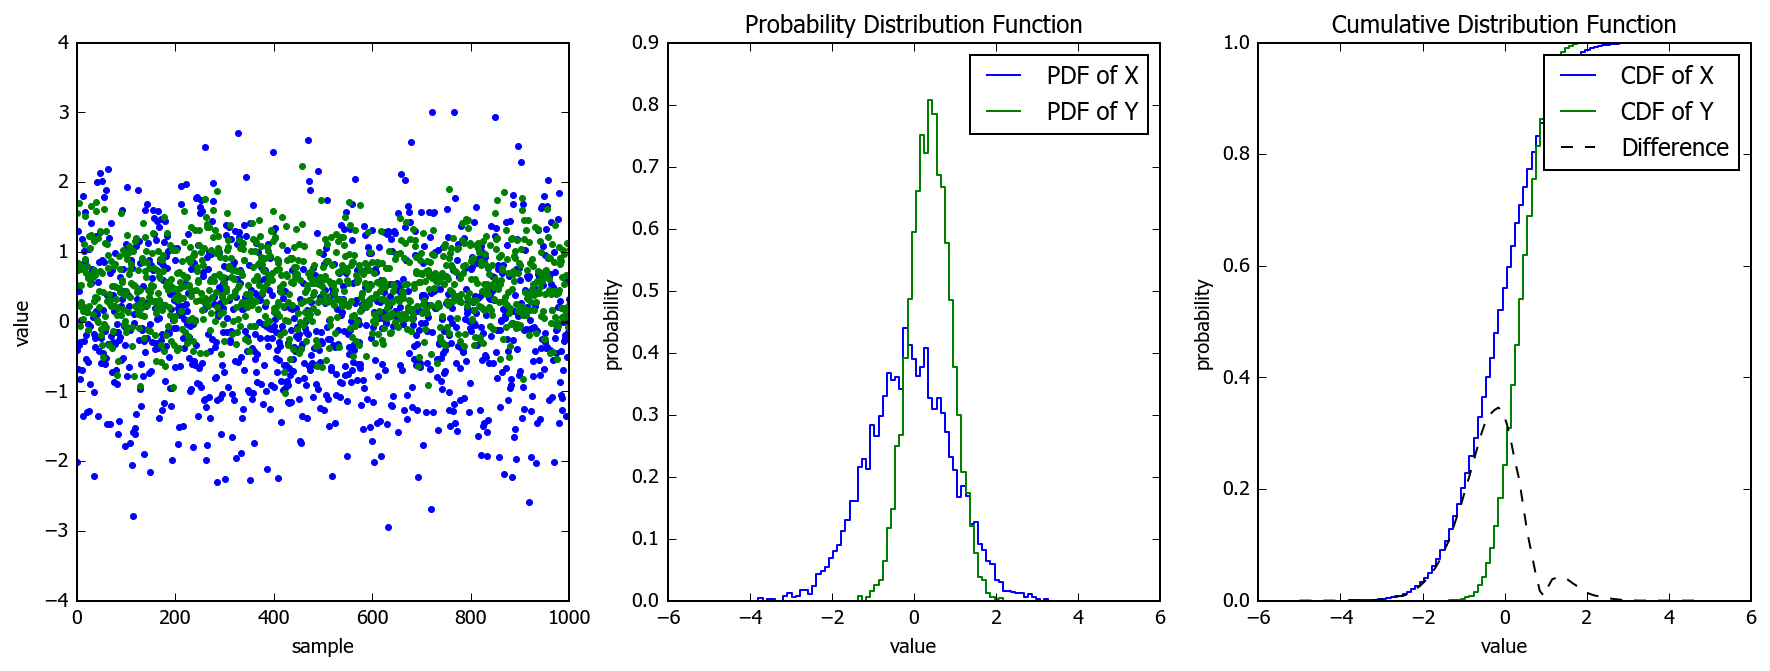

In [3]:
N = 5000
X = sp.random.randn(N)
Y = sp.random.randn(N)*0.5+0.5
bins=np.linspace(-5,5,100)

pdf_X = np.histogram(X,bins,normed=True)[0]
pdf_Y = np.histogram(Y,bins,normed=True)[0]

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(X, '.')
plt.plot(Y, '.')
plt.xlim((0,1000))
plt.xlabel('sample')
plt.ylabel('value')

plt.subplot(1,3,2)
plt.step(bins[:-1],pdf_X)
plt.step(bins[:-1],pdf_Y)
plt.legend(('PDF of X', 'PDF of Y'))
plt.ylabel('Probability')
plt.xlabel('value')
plt.ylabel('probability')
plt.title('Probability Distribution Function')

plt.subplot(1,3,3)
plt.step(bins[:-1],np.cumsum(pdf_X)/np.sum(pdf_X))
plt.step(bins[:-1],np.cumsum(pdf_Y)/np.sum(pdf_Y))
plt.plot(bins[:-1],np.abs(np.cumsum(pdf_X)/np.sum(pdf_X)-np.cumsum(pdf_Y)/np.sum(pdf_Y)), 'k--')
plt.ylabel('Probability')
plt.legend(('CDF of X', 'CDF of Y', 'Difference'))
plt.xlabel('value')
plt.ylabel('probability')
plt.title('Cumulative Distribution Function')
plt.show()

In [6]:
# stats.kstest() for comparing the distribution of one random variable to a "template"

# stats.ks_2samp compares two distribution
stats.ks_2samp(X.squeeze(),Y.squeeze())

Ks_2sampResult(statistic=0.34999999999999998, pvalue=9.8590868933837135e-268)

### Non-parametric hypothesis testing for skewed distributions

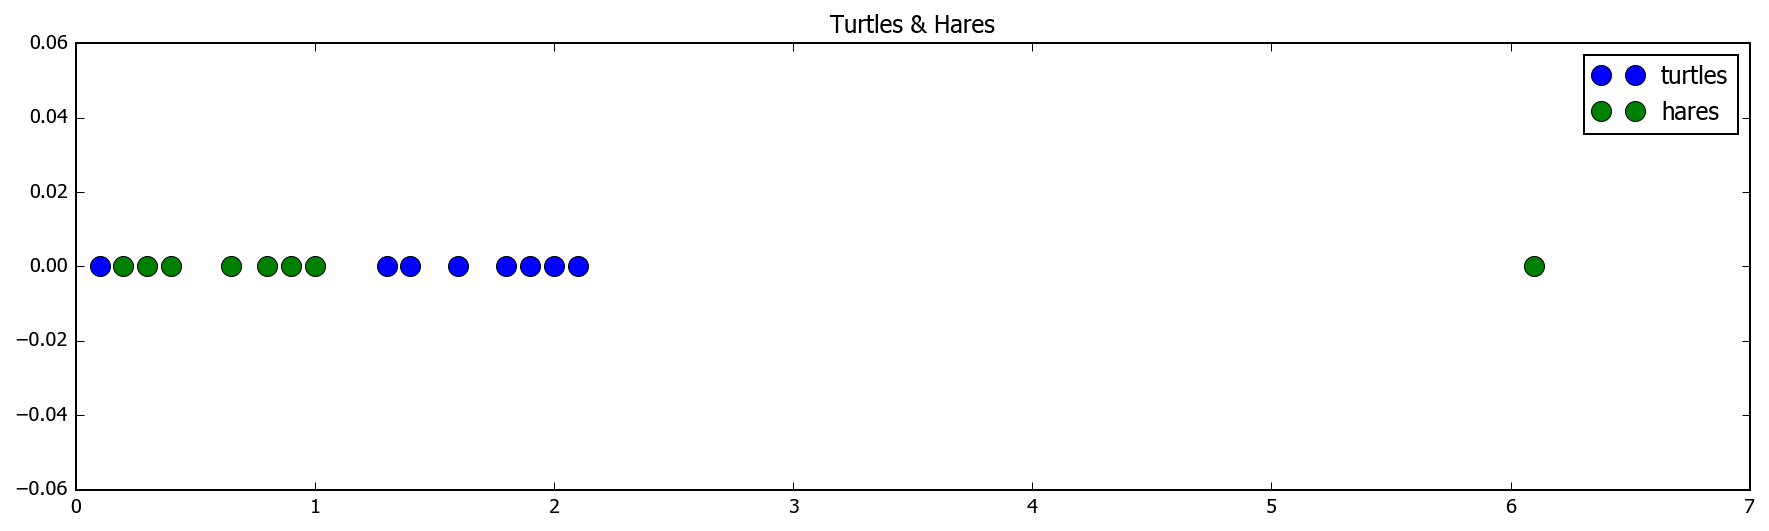

------- Parametric Test (t-test) --------
Ttest_indResult(statistic=0.31670236548980124, pvalue=0.75614258204692042)

------- Non-Parametric Test (MW) --------
MannwhitneyuResult(statistic=15.0, pvalue=0.041561468479951666)


In [14]:
turtles = np.array([0.1, 1.4, 1.8, 2.0, 1.3, 1.9, 2.1, 1.6])
hares = np.array([0.4, 0.8, 1.0, 0.3, .9, 6.1, 0.2, 0.65])
plt.figure(figsize=(15,4))
plt.plot(turtles,[0]*len(turtles), 'o', ms=10)
plt.plot(hares,[0]*len(hares), 'o', ms=10)
plt.legend(('turtles', 'hares'))
plt.title('Turtles & Hares')
plt.show()
print('------- Parametric Test (t-test) --------')
print(stats.ttest_ind(turtles,hares))
print('')
print('------- Non-Parametric Test (MW) --------')
print(stats.mannwhitneyu(turtles.squeeze(),hares.squeeze()))

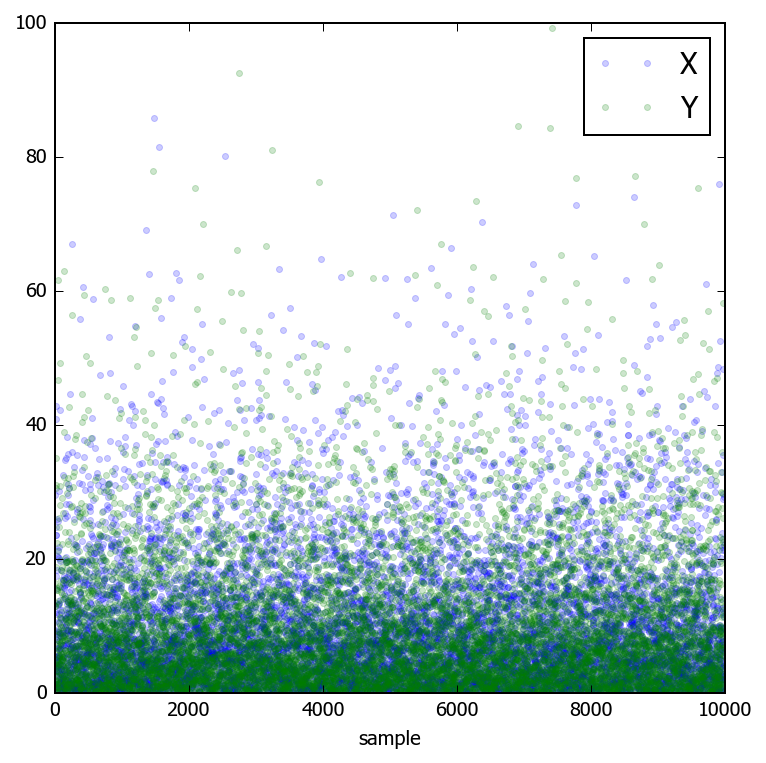

In [17]:
X = sp.random.exponential(scale=10, size=(10000,1))
Y = sp.random.exponential(scale=10, size=(10000,1))
Y[-10:] = sp.random.exponential(scale=10000, size=(10,1))
plt.figure(figsize=(6,6))
plt.plot(X,'.',alpha=0.2)
plt.plot(Y,'.',alpha=0.2)
plt.legend(('X', 'Y'), fontsize=15)
plt.xlabel('sample')
plt.ylim((0, 100))
plt.show()

In [18]:
print('Mean & Std of X:', np.mean(X), np.std(X))
print('Mean & Std of Y:', np.mean(Y), np.std(Y))
print('---')
print('Median of X:', np.median(X))
print('Median of Y:', np.median(Y))

Mean & Std of X: 10.0231797621 10.170016898
Mean & Std of Y: 19.3581948712 344.797091984
---
Median of X: 6.88104105364
Median of Y: 7.01997833113


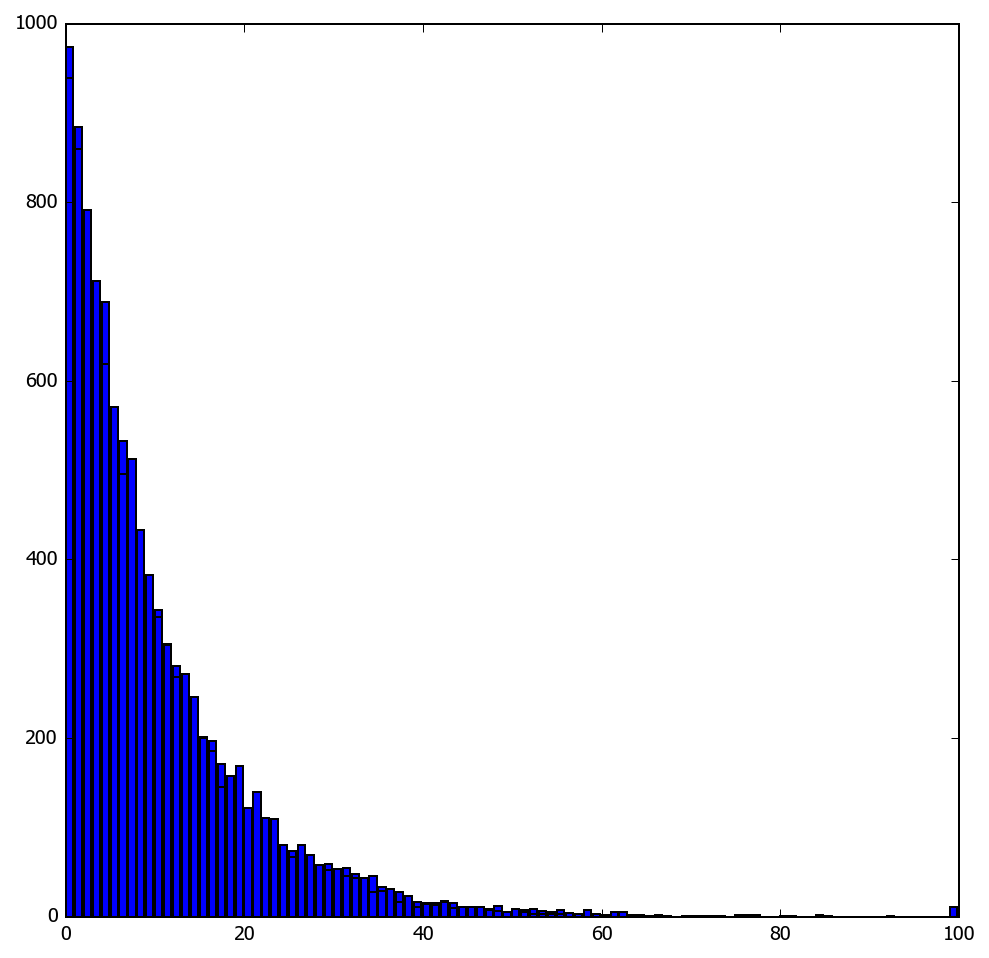

In [19]:
plt.figure(figsize=(8,8))
HX,bins = np.histogram(X,bins=np.append(np.arange(0,100),1e10));
HY,bins = np.histogram(Y,bins=np.append(np.arange(0,100),1e10));
plt.bar(bins[:-1],HX)
plt.bar(bins[:-1],HY)
plt.show()

In [20]:
print('------- Parametric Tests --------')
print(stats.ttest_ind(X,Y))
print(stats.ttest_rel(X,Y))
print('')
print('------- Non-Parametric Tests --------')
print(stats.wilcoxon(X.squeeze(),Y.squeeze()))
print(stats.mannwhitneyu(X.squeeze(),Y.squeeze()))

------- Parametric Tests --------
Ttest_indResult(statistic=array([-2.70608155]), pvalue=array([ 0.00681401]))
Ttest_relResult(statistic=array([-2.70656542]), pvalue=array([ 0.00680986]))

------- Non-Parametric Tests --------
WilcoxonResult(statistic=24725031.0, pvalue=0.33649750155698199)
MannwhitneyuResult(statistic=49650263.0, pvalue=0.19581791337899751)


### rank correlation

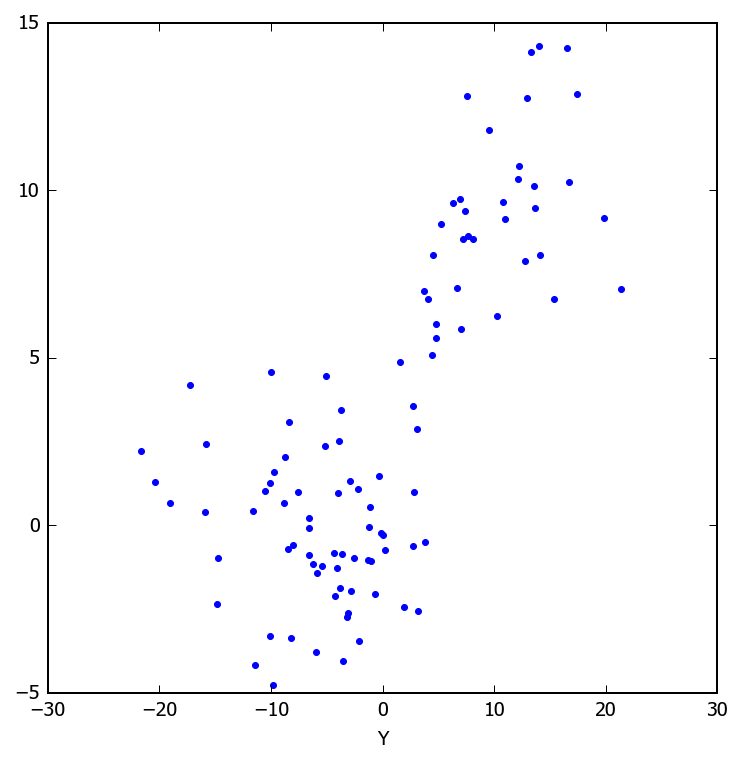

In [21]:
x = np.random.randn(100)*10
y = 10./(1.0 + 100.*np.exp(-x)) + np.random.randn(len(x))*2.
plt.figure(figsize=(6,6))
plt.plot(x,y, '.')
plt.xlabel('X')
plt.xlabel('Y')
plt.show()

In [23]:
print('Pearson Correlation: ',sp.stats.pearsonr(x,y)[0])
print('Spearman Correlation: ',sp.stats.spearmanr(x,y)[0])

Pearson Correlation:  0.734979099214
Spearman Correlation:  0.675787578758


### bootstrapping

In [24]:
import numpy as np
def rand_samples(data, N_picks=100, N_subsamples=None):
    """
    randomly resample data (with replacement) to build an empirical null distribution

    perform resampling N_picks number of times, each time with N_subsamples number of
    resampled points; return each resampled sample through yield
    """
    N_data = len(data)
    if N_subsamples is None:        
        N_subsamples = N_data
        
    for tr in range(N_picks):
        # yield so not to return the whole resampled matrix
        yield data[np.random.choice(N_data,size=N_subsamples, replace=True)]                        

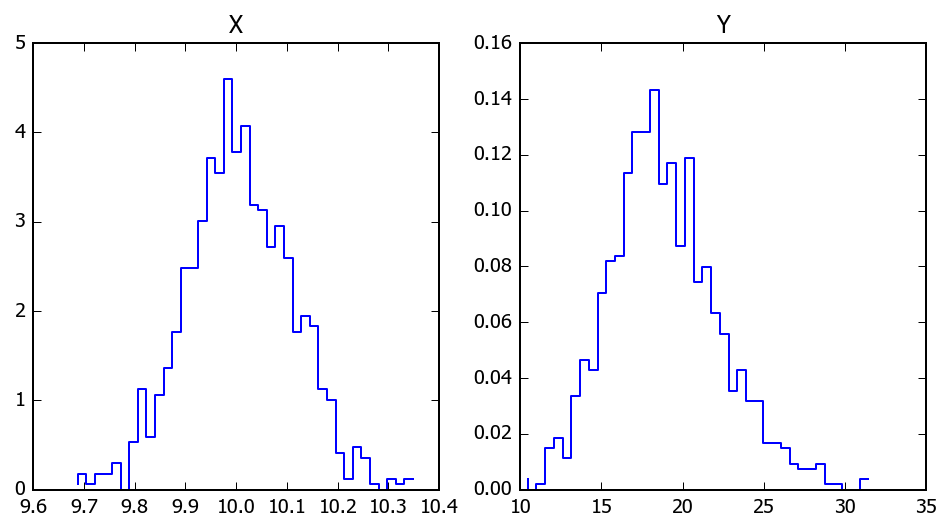

In [25]:
bs_meanX = [np.mean(bs_sample) for bs_sample in rand_samples(X, N_picks=1000, N_subsamples=None)]
bs_meanY = [np.mean(bs_sample) for bs_sample in rand_samples(Y, N_picks=1000, N_subsamples=None)]

HuX, binsX = np.histogram(bs_meanX,40,normed=True)[:2];
HuY, binsY = np.histogram(bs_meanY,40,normed=True)[:2];

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.step(binsX[:-1], HuX)
plt.title('X')
plt.subplot(1,2,2)
plt.step(binsY[:-1], HuY)
plt.title('Y')
plt.show()